# Simple and Multi Linear Regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# Dataset: Manually added
data = {
    'Population': [10000, 15000, 20000, 9000, 12000],
    'Years_in_business': [5, 6, 6, 5, 4],
    'Profit': [10000, 12000, 13000, 12000, np.nan]
}
df = pd.DataFrame(data)
df

,Population,Years_in_business,Profit
0,10000,5,10000.0
1,15000,6,12000.0
2,20000,6,13000.0
3,9000,5,12000.0
4,12000,4,NaN


### Simple Linear Regression (Population → Profit)

In [9]:
# Filter out row with missing profit
df_simple = df.dropna(subset=['Profit'])

# Features and labels
X_simple = df_simple[['Population']].values
y_simple = df_simple['Profit'].values

# Add intercept
X_b = np.c_[np.ones((X_simple.shape[0], 1)), X_simple]

# Normal Equation
theta_normal = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_simple

def predict_simple(population):
    return theta_normal[0] + theta_normal[1] * population

print("Simple Linear Regression Coefficients:", theta_normal)


Simple Linear Regression Coefficients: [9.38311688e+03 1.75324675e-01]


### Manual Gradient Descent

In [10]:
def gradient_descent(X, y, alpha=0.000000001, epochs=10000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.zeros(2)
    for _ in range(epochs):
        gradients = (2/m) * X_b.T @ (X_b @ theta - y)
        theta -= alpha * gradients
    return theta

theta_gd = gradient_descent(X_simple, y_simple)
print("Gradient Descent Coefficients:", theta_gd)


Gradient Descent Coefficients: [0.01798189 0.80396902]


### Performance Evaluation (Simple Linear)

In [11]:
y_pred_simple = X_b @ theta_normal
mse = mean_squared_error(y_simple, y_pred_simple)
mae = mean_absolute_error(y_simple, y_pred_simple)
rmse = np.sqrt(mse)
r2 = r2_score(y_simple, y_pred_simple)

print("Simple Linear Regression Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Simple Linear Regression Metrics:
MSE: 595779.2207792208
MAE: 574.6753246753251
RMSE: 771.8673595762557
R²: 0.4982911825017088


### Multi-Linear Regression (Population + Years → Profit)

In [12]:
# Prepare data
df_multi = df.dropna(subset=['Profit'])
X_multi = df_multi[['Population', 'Years_in_business']].values
y_multi = df_multi['Profit'].values

# Add intercept
X_b_multi = np.c_[np.ones((X_multi.shape[0], 1)), X_multi]

# Normal Equation
theta_multi = np.linalg.inv(X_b_multi.T @ X_b_multi) @ X_b_multi.T @ y_multi
print("Multi-Linear Regression Coefficients:", theta_multi)


Multi-Linear Regression Coefficients: [7.01923077e+03 1.15384615e-01 5.76923077e+02]


### Performance Evaluation (Multi-Linear)

In [13]:
y_pred_multi = X_b_multi @ theta_multi
mse_multi = mean_squared_error(y_multi, y_pred_multi)
mae_multi = mean_absolute_error(y_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_multi, y_pred_multi)

print("Multi-Linear Regression Metrics:")
print("MSE:", mse_multi)
print("MAE:", mae_multi)
print("RMSE:", rmse_multi)
print("R²:", r2_multi)


Multi-Linear Regression Metrics:
MSE: 581730.7692307696
MAE: 634.615384615402
RMSE: 762.7127698096903
R²: 0.5101214574898782


### Model Comparison Table

In [14]:
comparison_df = pd.DataFrame({
    "Metric": ["MSE", "MAE", "RMSE", "R²"],
    "Simple Linear": [mse, mae, rmse, r2],
    "Multi-Linear": [mse_multi, mae_multi, rmse_multi, r2_multi]
})
print(comparison_df)


  Metric  Simple Linear   Multi-Linear
0    MSE  595779.220779  581730.769231
1    MAE     574.675325     634.615385
2   RMSE     771.867360     762.712770
3     R²       0.498291       0.510121


### Visualization

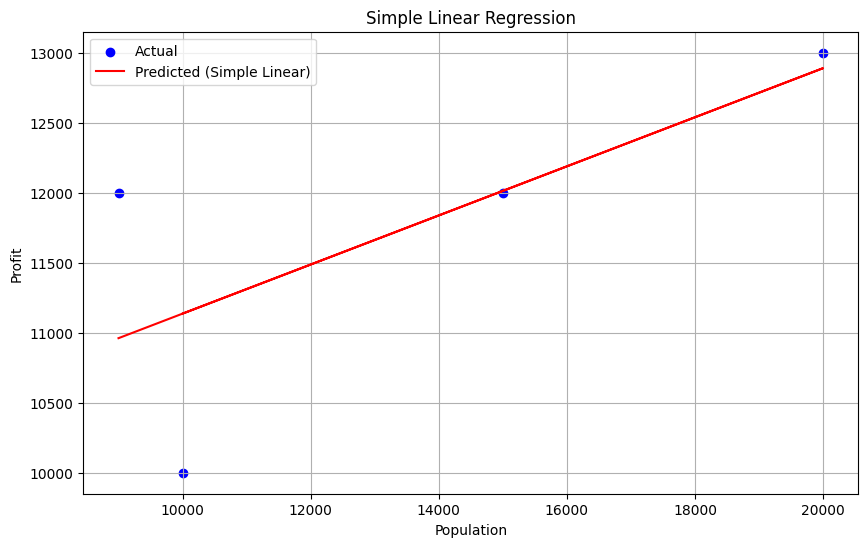

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df_simple['Population'], y_simple, color='blue', label='Actual')
plt.plot(df_simple['Population'], y_pred_simple, color='red', label='Predicted (Simple Linear)')
plt.xlabel("Population")
plt.ylabel("Profit")
plt.title("Simple Linear Regression")
plt.legend()
plt.grid(True)
plt.show()
